In [1]:
#!pip install pandas numpy matplotlib seaborn

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

In [69]:
data_train = pd.read_csv('data/sales_train.csv')

In [70]:
data_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [71]:
print(f'rows total: {len(data_train)}')
for col in data_train:
    print(col, data_train[col].nunique())

rows total: 2935849
date 1034
date_block_num 34
shop_id 60
item_id 21807
item_price 19993
item_cnt_day 198


In [72]:
print(data_train['date_block_num'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


In [73]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%d.%m.%Y')

In [74]:
print('max date:', data_train['date'].max(), 'min date:', data_train['date'].min())


max date: 2015-10-31 00:00:00 min date: 2013-01-01 00:00:00


<Axes: >

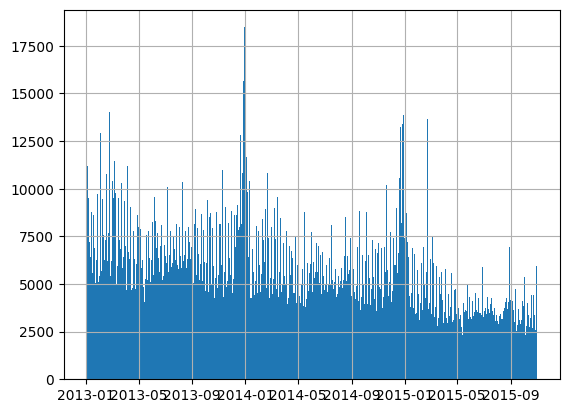

In [75]:
data_train['date'].hist(bins = 500)

In [76]:
print(f'nans:\n{data_train.isna().sum()}')

nans:
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


min price: -1.0
max price: 307980.0


<Axes: >

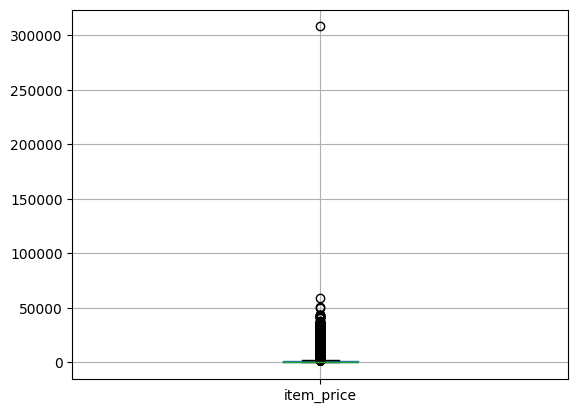

In [77]:
print(f'min price: {data_train['item_price'].min()}')
print(f'max price: {data_train['item_price'].max()}')
data_train.boxplot(column = ['item_price'])

In [78]:
print(data_train[data_train['item_price'] <= 0])#TO DELETE
print(data_train[data_train['item_price'] >= 100000])#TO DELETE


             date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683 2013-05-15               4       32     2973        -1.0           1.0
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
1163158 2013-12-13              11       12     6066    307980.0           1.0


<Axes: >

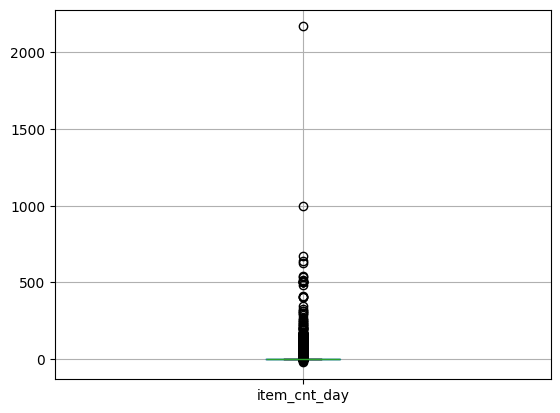

In [79]:
data_train.boxplot(column='item_cnt_day')


In [80]:
data_train[data_train['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [81]:
data_train[data_train['item_cnt_day'] < 0].corr()#item_cnt_day is randomly noised? - TO DELETE(date is not continious)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,1.000000,0.999515,-0.000470,-0.036921,0.116737,0.007314
date_block_num,0.999515,1.000000,-0.001503,-0.037050,0.117243,0.006860
shop_id,-0.000470,-0.001503,1.000000,0.044904,-0.052065,0.048756
item_id,-0.036921,-0.037050,0.044904,1.000000,-0.114833,-0.001849
item_price,0.116737,0.117243,-0.052065,-0.114833,1.000000,-0.007380
item_cnt_day,0.007314,0.006860,0.048756,-0.001849,-0.007380,1.000000


In [82]:
item_cat = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')

In [83]:
print('more 700 sold per day\n\n',data_train[data_train['item_cnt_day'] >= 700],sep='')#Not outliers?
id = 10039

more 700 sold per day

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
2326930 2015-01-15              24       12    20949    4.000000        1000.0
2909818 2015-10-28              33       12    11373    0.908714        2169.0


In [84]:
data_train[data_train['item_id']==id]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
3516,2013-01-04,0,24,10039,299.0,1.0
3517,2013-01-12,0,24,10039,299.0,1.0
3518,2013-01-23,0,24,10039,299.0,1.0
10451,2013-01-31,0,19,10039,299.0,1.0
14990,2013-01-19,0,21,10039,299.0,1.0
...,...,...,...,...,...,...
2898480,2015-10-04,33,58,10039,249.0,1.0
2907047,2015-10-12,33,52,10039,249.0,1.0
2913989,2015-10-31,33,19,10039,249.0,1.0
2935262,2015-10-04,33,25,10039,249.0,1.0


product name: 10039    ВОССТАНИЕ ПЛАНЕТЫ ОБЕЗЬЯН (BD)
Name: item_name, dtype: object


<Axes: xlabel='date', ylabel='item_cnt_day'>

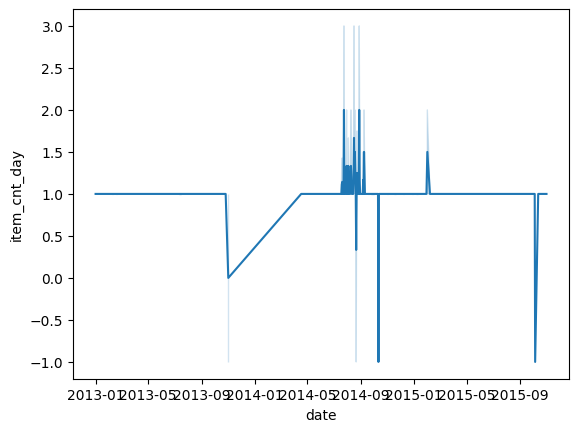

In [85]:

prod = data_train[data_train['item_id'] == id]#11373 - outlier, 20949 not outlier
print('product name:',items[items['item_id']==id]['item_name'])
#print('product:\n\n',prod,sep='')#Not outliers?
sns.lineplot(x=prod['date'], y=prod['item_cnt_day'])

In [86]:
print('number of negative sales:',sum(data_train['item_cnt_day']<0))
data_train[data_train['item_cnt_day']<0]

number of negative sales: 7356


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [87]:
print('unique counts per id in item_cat:',item_cat.groupby(by='item_category_id').nunique().reset_index()['item_category_name'].unique())
print('unique counts per id in item_cat:',items.groupby(by='item_id').nunique().reset_index()['item_name'].unique())
print('unique counts per id in item_cat:',shops.groupby(by='shop_id').nunique().reset_index()['shop_name'].unique())

unique counts per id in item_cat: [1]
unique counts per id in item_cat: [1]
unique counts per id in item_cat: [1]


In [88]:

merged = data_train.merge(items,how='left').merge(item_cat,how='left').merge(shops,how='left')
print('Nans in merged:\n',merged.isna().sum(),sep='')

Nans in merged:
date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64


In [89]:
merged[merged['date'].isna()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name


In [90]:
merged=merged.drop(['shop_id','item_id','item_category_id'], axis=1)

In [91]:
merged['item_category_name'].nunique()

84

In [92]:
#средняя цена по месяцам, средняя товара по категориям и магазинам, за месяц

<Axes: >

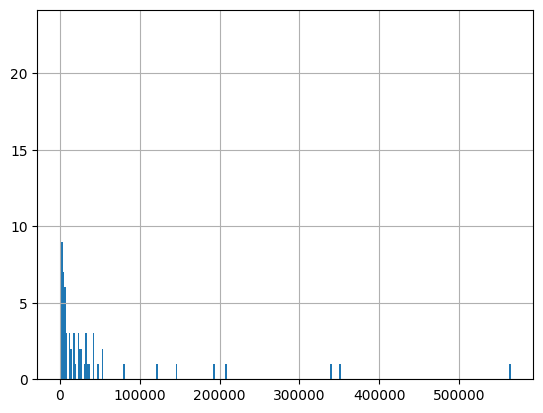

In [93]:
merged['item_category_name'].value_counts().hist(bins=300)

In [94]:
merged[merged.duplicated()]

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
76962,2013-01-05,0,149.0,1.0,УЧЕНИК ЧАРОДЕЯ (регион),Кино - DVD,"Химки ТЦ ""Мега"""
1435367,2014-02-23,13,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360,"Тюмень ТЦ ""Гудвин"""
1496766,2014-03-23,14,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360,"Москва МТРЦ ""Афи Молл"""
1671873,2014-05-01,16,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360,"Тюмень ТЦ ""Гудвин"""
1866340,2014-07-12,18,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360,"Москва ТРК ""Атриум"""
2198566,2014-12-31,23,499.0,1.0,ЧЕЛОВЕК ДОЖДЯ (BD),Кино - Blu-Ray,"СПб ТК ""Невский Центр"""


In [95]:
merged['item_name'].value_counts()

item_name
Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм                                    31340
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.                            9408
Прием денежных средств для 1С-Онлайн                                                      9067
Diablo III [PC, Jewel, русская версия]                                                    7479
Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 year Renewal Box     6853
                                                                                         ...  
Футболка Assassin's Creed Syndicate Bronze Crest XL                                          1
Футболка Borderlands Jack Hero L                                                             1
Футболка Call Of Duty Black Ops III L                                                        1
Футболка Darksiders The Horseman L                                                           1
Футболка Darksiders The Horseman XL     

<Axes: ylabel='count'>

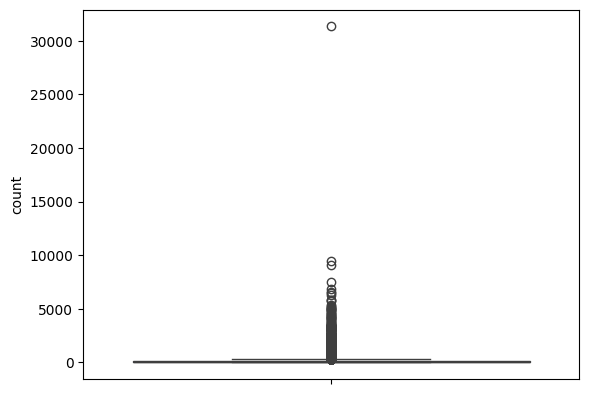

In [96]:
sns.boxplot(merged['item_name'].value_counts())

<Axes: xlabel='count', ylabel='Count'>

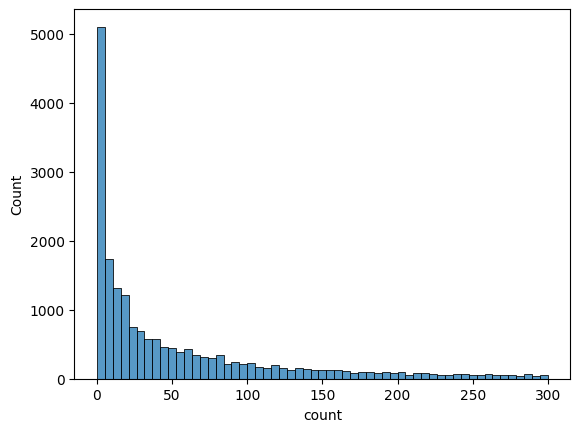

In [97]:
sns.histplot(merged['item_name'].value_counts(), binrange=[0,300])

In [98]:
#print(set(item_cat.item_category_id) - set(items.item_category_id))
#print(set(data_train.item_id) - set(items.item_id))
#print(set(data_train.shop_id) - set(shops.shop_id))
#print(set(items.item_category_id)-set(item_cat.item_category_id))
print(set(items.item_id)-set(data_train.item_id) )
#print(set(shops.shop_id)-set(data_train.shop_id) )

{20486, 6152, 6153, 6169, 14383, 20535, 4156, 10310, 20560, 20561, 83, 20577, 16498, 6259, 20594, 20599, 20600, 12409, 18560, 10372, 140, 8337, 12441, 8354, 8355, 168, 173, 12468, 12469, 12470, 12471, 14521, 6335, 18627, 20677, 20680, 204, 4310, 16601, 4318, 237, 10483, 249, 254, 10507, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 12568, 20760, 12574, 16675, 6439, 302, 12591, 14647, 14648, 4412, 20796, 14662, 8545, 20836, 8549, 20837, 8551, 20843, 20845, 2420, 6519, 6520, 6521, 2426, 2427, 2428, 6522, 6523, 6524, 6525, 6526, 2434, 6527, 6528, 6529, 6530, 6531, 6532, 6533, 20878, 20879, 20880, 402, 14739, 14760, 16811, 428, 14765, 430, 16813, 14784, 454, 480, 18913, 8676, 14832, 6645, 10747, 12802, 20996, 20863, 2569, 8722, 10779, 4642, 18979, 566, 8760, 6729, 6730, 6731, 6732, 6733, 6734, 16976, 6742, 6743, 12890, 19048, 14959, 8821, 8822, 8823, 8824, 8825, 8826, 12920, 14972, 639, 640, 17030, 19085, 8850, 12961, 2722, 15033, 8890, 15034, 21196, 6863, 19155, 17117, 21214, 6891, 6903, 1304

In [99]:
merged[(merged['item_name'] =='ЯРОСТЬ (BD)') & (merged['shop_name']== 'Москва ТЦ "МЕГА Теплый Стан" II')].date# - date is not uniform

2467696   2015-02-27
2467715   2015-02-24
2467716   2015-02-22
2467717   2015-02-18
2467718   2015-02-16
2467719   2015-02-15
2467720   2015-02-14
2467722   2015-02-12
2467723   2015-02-10
2467729   2015-02-11
2537828   2015-03-03
2537829   2015-03-04
2537830   2015-03-05
2537831   2015-03-08
2537832   2015-03-15
2537833   2015-03-24
2537834   2015-03-28
2537835   2015-03-29
2554013   2015-04-03
2554014   2015-04-19
2554023   2015-04-11
2554031   2015-04-29
2554032   2015-04-28
2628976   2015-05-03
2628977   2015-05-24
2819272   2015-08-21
Name: date, dtype: datetime64[ns]

In [100]:
print(1-len(merged)/len(data_train))

0.0
